In [14]:
import numpy as np
import pandas as pd

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data = pd.read_csv('/content/drive/MyDrive/7주차/spam.csv')

In [12]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

# preprocessing

- 영어에는 축약형이 존재하기 때문에 이를 처리하는 사전을 생성함

In [13]:
# 전처리 함수에서 사용할 contractions 생성
contractions = {"'cause": 'because',
 "I'd": 'I would',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'll've": 'I will have',
 "I'm": 'I am',
 "I've": 'I have',
 "ain't": 'is not',
 "aren't": 'are not',
 "can't": 'cannot',
 "could've": 'could have',
 "couldn't": 'could not',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he would',
 "he'll": 'he will',
 "he's": 'he is',
 "here's": 'here is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how is',
 "i'd": 'i would',
 "i'd've": 'i would have',
 "i'll": 'i will',
 "i'll've": 'i will have',
 "i'm": 'i am',
 "i've": 'i have',
 "isn't": 'is not',
 "it'd": 'it would',
 "it'd've": 'it would have',
 "it'll": 'it will',
 "it'll've": 'it will have',
 "it's": 'it is',
 "let's": 'let us',
 "ma'am": 'madam',
 "mayn't": 'may not',
 "might've": 'might have',
 "mightn't": 'might not',
 "mightn't've": 'might not have',
 "must've": 'must have',
 "mustn't": 'must not',
 "mustn't've": 'must not have',
 "needn't": 'need not',
 "needn't've": 'need not have',
 "o'clock": 'of the clock',
 "oughtn't": 'ought not',
 "oughtn't've": 'ought not have',
 "sha'n't": 'shall not',
 "shan't": 'shall not',
 "shan't've": 'shall not have',
 "she'd": 'she would',
 "she'd've": 'she would have',
 "she'll": 'she will',
 "she'll've": 'she will have',
 "she's": 'she is',
 "should've": 'should have',
 "shouldn't": 'should not',
 "shouldn't've": 'should not have',
 "so's": 'so as',
 "so've": 'so have',
 "that'd": 'that would',
 "that'd've": 'that would have',
 "that's": 'that is',
 "there'd": 'there would',
 "there'd've": 'there would have',
 "there's": 'there is',
 "they'd": 'they would',
 "they'd've": 'they would have',
 "they'll": 'they will',
 "they'll've": 'they will have',
 "they're": 'they are',
 "they've": 'they have',
 "this's": 'this is',
 "to've": 'to have',
 "wasn't": 'was not',
 "we'd": 'we would',
 "we'd've": 'we would have',
 "we'll": 'we will',
 "we'll've": 'we will have',
 "we're": 'we are',
 "we've": 'we have',
 "weren't": 'were not',
 "what'll": 'what will',
 "what'll've": 'what will have',
 "what're": 'what are',
 "what's": 'what is',
 "what've": 'what have',
 "when's": 'when is',
 "when've": 'when have',
 "where'd": 'where did',
 "where's": 'where is',
 "where've": 'where have',
 "who'll": 'who will',
 "who'll've": 'who will have',
 "who's": 'who is',
 "who've": 'who have',
 "why's": 'why is',
 "why've": 'why have',
 "will've": 'will have',
 "won't": 'will not',
 "won't've": 'will not have',
 "would've": 'would have',
 "wouldn't": 'would not',
 "wouldn't've": 'would not have',
 "y'all": 'you all',
 "y'all'd": 'you all would',
 "y'all'd've": 'you all would have',
 "y'all're": 'you all are',
 "y'all've": 'you all have',
 "you'd": 'you would',
 "you'd've": 'you would have',
 "you'll": 'you will',
 "you'll've": 'you will have',
 "you're": 'you are',
 "you've": 'you have'}

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# NLTK의 불용어
stop_words = set(stopwords.words('english'))
print('불용어 개수 :', len(stop_words))
print(stop_words)

불용어 개수 : 179
{'after', 'but', "isn't", 'between', 'your', 'aren', 'this', 'nor', 'don', 'can', "needn't", 'because', 'there', 'be', 'until', 'own', 'than', "aren't", 'where', 'hers', 'mightn', 's', 'of', "didn't", 'isn', 'their', 'when', 'hadn', 'does', 'in', 'themselves', 'once', 'if', 'here', 'd', 'that', 'mustn', 'by', 'few', 'do', 'a', 'wouldn', 'and', "you'll", 'hasn', "she's", 'same', 'were', "wouldn't", 'will', 'm', 'at', "that'll", "weren't", 'then', 'very', 'him', 'all', 'was', 'which', 'itself', "couldn't", "doesn't", 'needn', 'weren', 'ourselves', 'up', 'both', 'has', 'above', 'our', 'y', 'being', 'off', 'she', 'during', 'had', 'herself', 'wasn', 'what', "you've", 'yourselves', 'just', 'should', "mightn't", 'my', 'on', 'is', 'doesn', "won't", 'himself', 'against', 'yours', 'again', 'such', 'having', "wasn't", 've', 'them', 'didn', 'no', 't', 'll', "haven't", 'each', 'down', 'ma', "shan't", 'ain', 'an', 'he', 'into', 'its', 'any', 'about', 'me', 'they', 'under', 'to', 'are', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


- 전처리 함수 생성
  - 링크와 같은 의미 없는 것들은 제거
  - ummmm처럼 강조의 표현으로 사용된 반복된 알파벳은 제거
  - 소유격, 약어(축약형) 처리
  - 특수문자, html 태그 제거

- 본 과제에서는 ham vs spam을 분류하는 모델을 구현하는 것이 아니기 때문에 링크를 제거하였지만, 실제로 스팸과 햄을 분류할 때에는 링크의 존재 여부도 꽤 중요하기 떄문에 전처리 시에 이를 고려해야 한다.

In [18]:
import re
from bs4 import BeautifulSoup

# 전처리 함수
def preprocess_sentence(sentence, remove_stopwords = True):
    sentence = re.sub(r'https?:\/\/.*?[\s+]', '', sentence) # 링크 제거
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # ,  등의 html 태그 제거
    sentence = re.sub(r'', '', sentence) # 괄호로 닫힌 문자열  제거 Ex) my friend(yugyeong) -> my friend
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) yugyeong's -> yugyeong
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm -> umm


    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

- v2 전처리를 수행하고, 전처리 결과(clean_v2) 확인

In [20]:
clean_v2 = []
for s in data['v2']:
    clean_v2.append(preprocess_sentence(s))
clean_v2

<ipython-input-18-49c7224a8b25>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, "lxml").text # ,  등의 html 태그 제거


['go jurong point crazy available bugis great world la buffet cine got amore wat',
 'ok lar joking wif oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate apply',
 'dun say early hor already say',
 'nah think goes usf lives around though',
 'freemsg hey darling week word back would like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aids patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hours',
 'mobile months entitled update latest colour mobiles camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight cried enough today',
 'six chances win cash pounds txt csh send cost day days tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim www dbuk net lccltd pobox ldnw rw',
 'se

- 모두 제대로 처리된 것을 확인할 수 있음.

In [21]:
data['v2'] = clean_v2

In [22]:
# 전처리 진행과정에서 결측치 생성 여부 확인
print(data.isnull().sum())

v1    0
v2    0
dtype: int64


In [23]:
data

,v1,v2
0,ham,go jurong point crazy available bugis great wo...
1,ham,ok lar joking wif oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,dun say early hor already say
4,ham,nah think goes usf lives around though
...,...,...
5567,spam,nd time tried contact pound prize claim easy c...
5568,ham,going esplanade fr home
5569,ham,pity mood suggestions
5570,ham,guy bitching acted like would interested buyin...


# 토큰화

In [25]:
import nltk
from nltk.tokenize import word_tokenize
import string

# NLTK 리소스 다운로드
nltk.download('punkt')

# 텍스트 전처리 함수
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# 전처리 수행
data['v2'] = data['v2'].apply(tokenize_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
data

,v1,v2
0,ham,"[go, jurong, point, crazy, available, bugis, g..."
1,ham,"[ok, lar, joking, wif, oni]"
2,spam,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,"[dun, say, early, hor, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"
...,...,...
5567,spam,"[nd, time, tried, contact, pound, prize, claim..."
5568,ham,"[going, esplanade, fr, home]"
5569,ham,"[pity, mood, suggestions]"
5570,ham,"[guy, bitching, acted, like, would, interested..."


- gensim 라이브러리는 Word2Vec, CBOW, Skip-gram을 위해
- sklearn은 One-hot encoding을 위해
- glove_python은 GloVe를 위해 필요함

# Embedding

In [28]:
from sklearn.preprocessing import OneHotEncoder
from gensim.models import Word2Vec
import gensim.downloader as api


# One-hot Encoding
tokens = data['v2'].tolist()  # 데이터프레임의 'v2' 컬럼에서 토큰 리스트를 추출
vocab = set([token for sublist in tokens for token in sublist])
word_to_index = {word: i for i, word in enumerate(vocab)}
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(np.array(list(word_to_index.keys())).reshape(-1, 1))

# Word2Vec - CBOW
cbow_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=1, workers=4, sg=0)

# Word2Vec - Skip-gram
skipgram_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# GloVe
# GloVe 모델은 사전에 훈련된 모델을 로드하는 방식으로 사용됨
glove_model = api.load("glove-wiki-gigaword-100")  # 100차원 벡터의 GloVe 모델


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1. One-hot Encoding
장점: 구현이 매우 간단하고 이해하기 쉬움.
단점: 벡터의 차원이 단어 집합의 크기와 같기 때문에 차원의 저주(curse of dimensionality)에 취약하고, 단어 간의 의미적 관계를 전혀 표현하지 못함.
2. Word2Vec (CBOW와 Skip-gram)
장점: 단어의 의미를 다차원 공간에 벡터로 표현할 수 있으며, 단어 간의 유사도를 계산할 수 있음. Skip-gram은 드문 단어나 구체적인 단어에 강하며, CBOW는 더 빠른 학습과 더 정확한 빈도수 높은 단어에 유리함.
단점: 학습 시간이 상대적으로 길 수 있으며, 단어의 의미가 여러 가지인 경우(다의어)를 잘 처리하지 못할 수 있음.
3. GloVe
장점: 전역 행렬 분해를 통해 단어 간의 의미적 관계를 효과적으로 학습할 수 있으며, 특히 단어 간의 동시 등장 확률에 기반하여 의미적 관계를 파악.
단점: 사전 훈련된 모델을 사용할 경우, 특정 도메인이나 데이터셋에 특화된 단어의 의미를 포착하지 못할 수 있음.

----

임베딩 방식은 데이터와 목표에 따라 달라지기 때문에 다양한 실험이 필요하다.

-> word2Vec은 의미적 유사성 반영, 효율적인 학습 과정, 광범위한 응용 가능성, 확장성과 사용의 용이성 등의 장점을 가지며, 널리 사용되고 검증된 기법이기 때문에 이를 사용하여 아래의 task를 수행하였음.

# 단어간 유사도 계산

In [31]:
# Word2Vec 모델을 사용하여 단어 간의 유사도 계산
similarity = cbow_model.wv.similarity('egg', 'dinner')
print(f"Similarity: {similarity}")

Similarity: 0.900772750377655


egg와 dinner의 의미적 유사도는 꽤 높은 편으로 나왔음.

# wordcloud 시각화

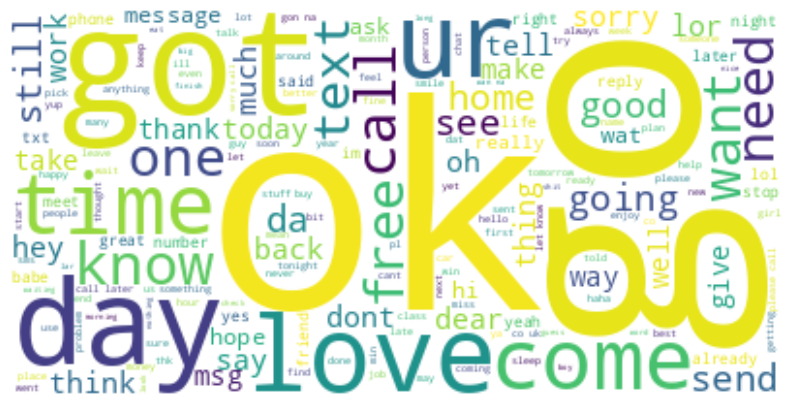

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 토큰화된 'v2' 컬럼에서 모든 텍스트를 하나의 문자열로 합침
text = " ".join([' '.join(tokens) for tokens in data['v2']])

# WordCloud 생성
wordcloud = WordCloud(background_color='white').generate(text)

# WordCloud 시각화
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()